### Capstone Project

#### Stock Price Prediction based based on historical Data and Sentiment Analysis

#### Short Summary

In this project, we would like to create a system that predicts stock market movements on a given day, based on time series data and market sentiment analysis. We will use Twitter data on that day to predict the price sentiment to perform analysis on historical data.

Sentiment analysis is a discipline of text classification. Sentiment analysis refers to the practice of applying NLP and text analysis techniques to identify and extract subjective information from a piece of text. Sentiment analysis works better on text that has a subjective context than it does on text with only an objective context. This is due to the fact that if a body of text has an objective context or perspective to it, the text usually depicts some normal statements or facts without expressing any emotion, feelings, or mood. Subjective text contains text that is usually expressed by a human having typical moods, emotions, and feelings.

It is also to build sentiment analysis model on Apple products that allowing us to categorize words of comments based on their sentiments such as whether they are positive, negative and also the magnitude of it.

### Statement of the Problem

I would like to train the system on three models and compare the performances of these three models. Furthermore, I would like to determine whether the addition of a public sentiment attribute is beneficial in the prediction of price movement. To help me examine these problems, we would like to raise three questions:

- Which classification method is the most accurate in predicting market movement on a given day? arima model?
- Does the addition of public sentiment, in this case from Twitter, help in the prediction of market movement

### Method

- The Python Natural Language Toolkit for my sentiment analysis and ncludes a number of trainable classifiers, including a Naive Bayes classifier with built-in training and classifying methods. finaly, we Correlate  the price score and sentiment score.

### Dataset

- For time series data analysis from Yahoo! Finance into csv and for sentiment analysis from the Twitter.

##  Library and data Setup 

In [204]:

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline



import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import copy
# Configure visual settings:
%matplotlib inline
sns.set_style('whitegrid')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use('ggplot')
np.random.seed(2020)
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error
import math


plt.style.use('ggplot') # if you are an R user and want to feel at home

In [206]:
df = pd.read_csv('./AAPL1.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,131.860001,131.949997,131.100006,131.779999,121.449577,30733300
1,2015-05-29,131.229996,131.449997,129.899994,130.279999,120.067184,50884500
2,2015-06-01,130.279999,131.389999,130.050003,130.539993,120.306801,32112800
3,2015-06-02,129.860001,130.660004,129.320007,129.960007,119.772255,33667600
4,2015-06-03,130.660004,130.940002,129.899994,130.119995,119.919716,30983500


In [207]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1255,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
1256,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800
1257,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500
1258,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28236300


In [208]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [209]:
df.shape

(1259, 7)

### Feature Extraction:
We will extract the month, day, and year from the ‘Date’ variable. We have seen earlier that the data type for ‘Date’ is an object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [210]:
from datetime import datetime
con=df['Date']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['2015-05-28', '2015-05-29', '2015-06-01', '2015-06-02',
               '2015-06-03', '2015-06-04', '2015-06-05', '2015-06-08',
               '2015-06-09', '2015-06-10',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-26', '2020-05-27'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

- There might be some hypothesis for the effect of day, month, and year on the Closing price. So, let’s extract the year, month, and day from the Datetime to validate our hypothesis.

In [211]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [212]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Date,,,,,,,,,
2015-05-28,131.860001,131.949997,131.100006,131.779999,121.449577,30733300,2015,5,28
2015-05-29,131.229996,131.449997,129.899994,130.279999,120.067184,50884500,2015,5,29
2015-06-01,130.279999,131.389999,130.050003,130.539993,120.306801,32112800,2015,6,1
2015-06-02,129.860001,130.660004,129.320007,129.960007,119.772255,33667600,2015,6,2
2015-06-03,130.660004,130.940002,129.899994,130.119995,119.919716,30983500,2015,6,3


### Exploratory Data Analysis:
Let us try to verify our hypothesis using the actual data. Our first hypothesis will be the closing prices will increase from august to November 2020. So let’s look at the monthly closing prices in 2020.

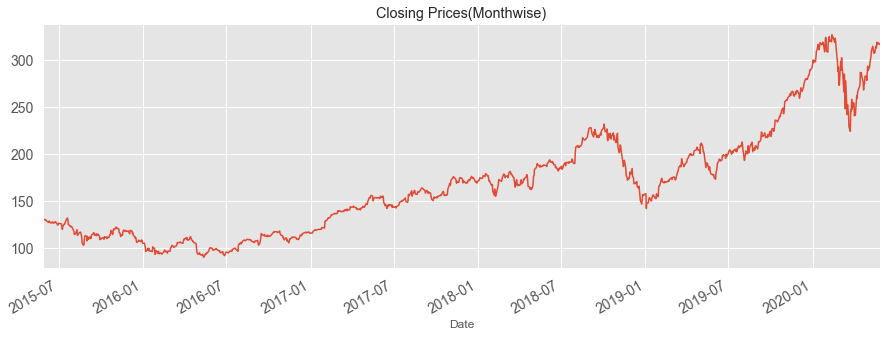

In [213]:
df1=df.groupby(['Date'])['Close'].mean() 
df1.plot(figsize=(15,5), title= 'Closing Prices(Monthwise)', fontsize=14)

We can see that there is an uptrend during the specified time frame.

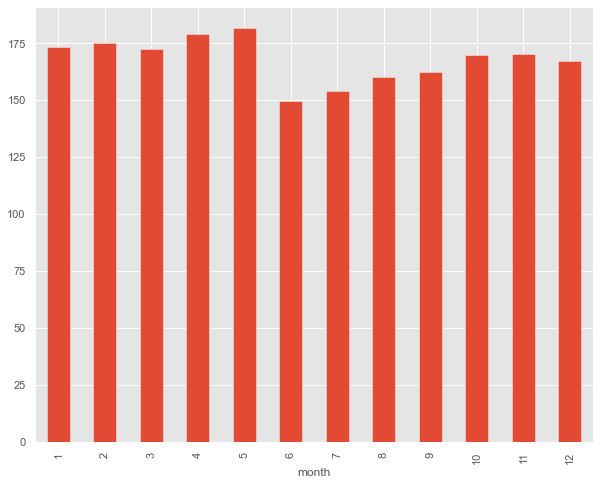

In [214]:
df.groupby('month')['Close'].mean().plot.bar()

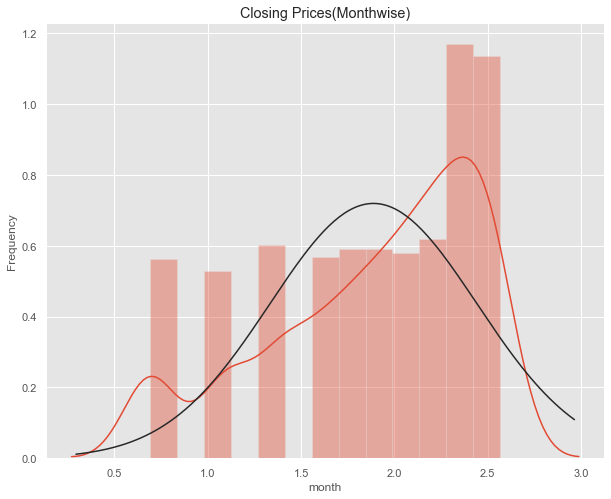

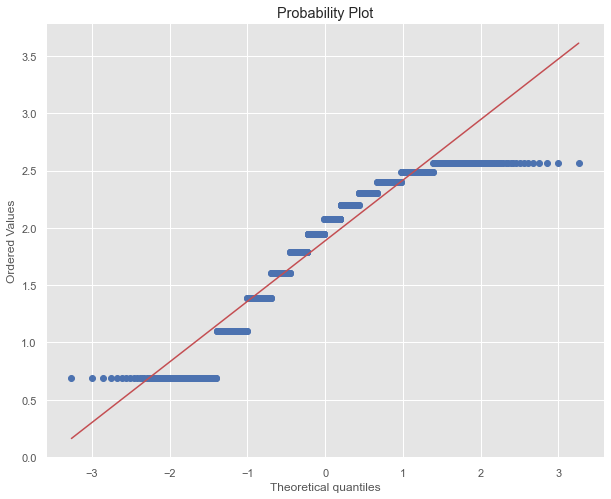

In [215]:
#log transform the target:
from scipy.stats import norm
from scipy import stats
df["month"] = np.log1p(df["month"])

# Kernel Density Plot
sns.distplot(df.month,fit=norm);
plt.ylabel('Frequency')
plt.title('Closing Prices(Monthwise)');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['month']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(df['month'], plot=plt)
plt.show()

In [216]:
corr = df.corr()

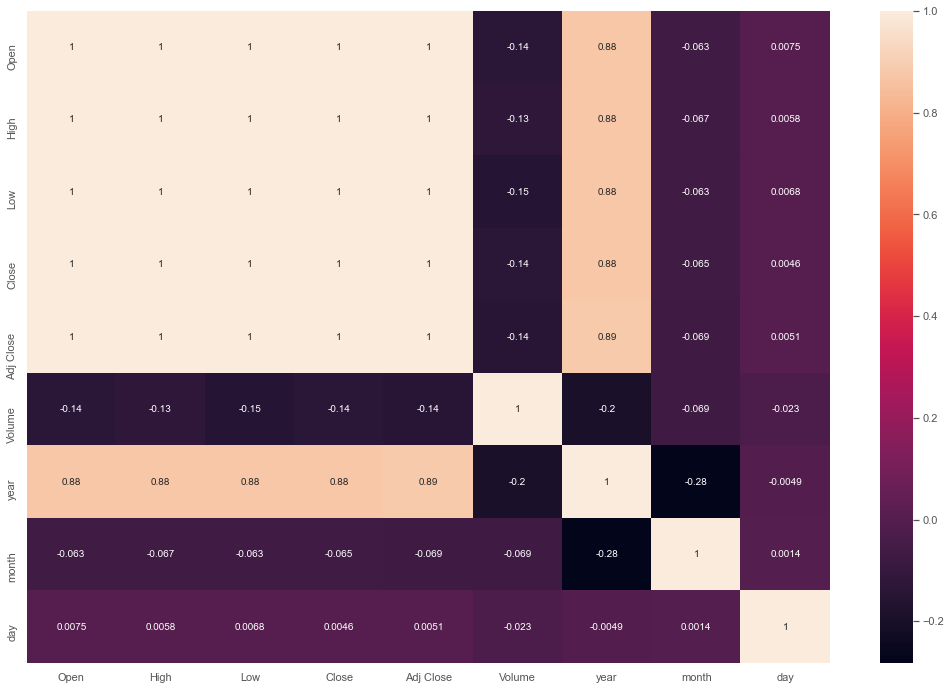

In [217]:
plt.figure(figsize=(18,12))

sns.heatmap(corr,
            annot=True);

In [221]:
X_train = df[:944]
X_test = df[945:]


<Figure size 864x576 with 0 Axes>

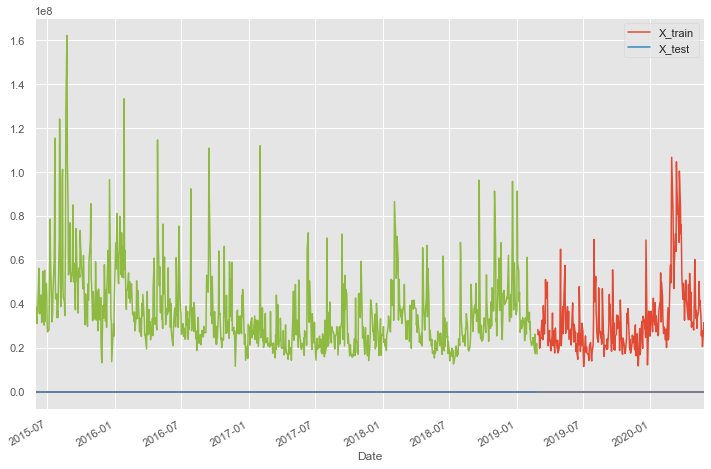

In [222]:
plt.figure(figsize =(12, 8))
ax = X_train.plot(grid = True, figsize = (12, 8))
X_test.plot(ax=ax, grid=True)
plt.legend(['X_train', 'X_test']);
plt.show()

### ARIMA model:
ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).
Where:
- p is the order of the autoregressive model(number of time lags)
- d is the degree of differencing(number of times the data have had past values subtracted)
- q is the order of moving average model.
Before building an ARIMA model, we have to make sure our data is stationary.

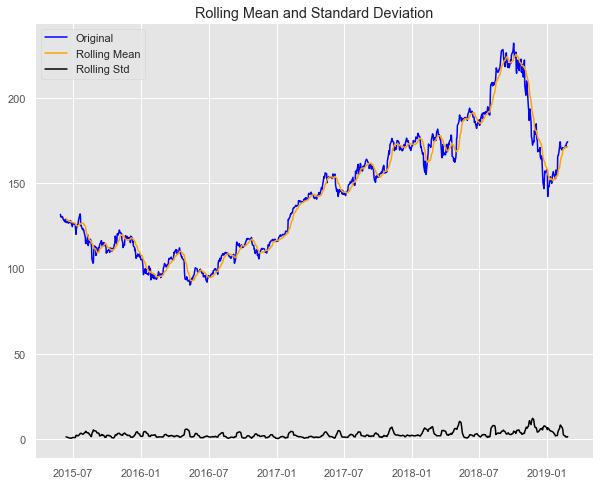

Results of Dickey-Fuller Test:
Test Statistic                  -0.917501
p-value                          0.782154
#Lags Used                       8.000000
Number of Observations Used    935.000000
Critical Value (1%)             -3.437363
Critical Value (5%)             -2.864636
Critical Value (10%)            -2.568419
dtype: float64


In [223]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    
     #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='orange', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(X_train['Close'])

### Making the time series stationary
To make the series stationary, we remove the trend and seasonality from the data. The resultant series will become stationary through this process.
Removing Trend:
We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example, log transformation.

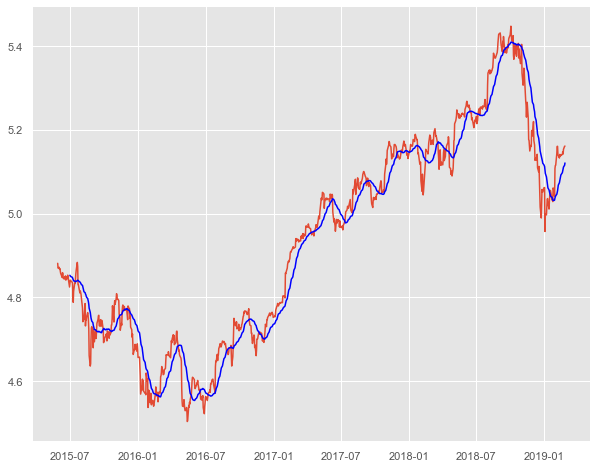

In [224]:
X_train_log = np.log(X_train['Close']) 
X_test_log = np.log(X_test['Close'])
moving_avg = X_train_log.rolling(24).mean() 
plt.plot(X_train_log) 
plt.plot(moving_avg, color = 'blue') 
plt.show()

So we can observe that there is a trend. Now we will remove this trend to make our time series stationary.

Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

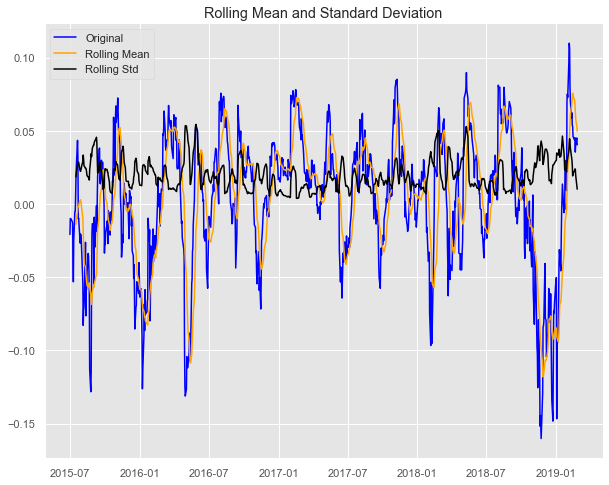

(None, None)

In [225]:
X_train_log_moving_avg_diff = X_train_log - moving_avg
X_train_log_moving_avg_diff.dropna(inplace = True), test_stationarity(X_train_log_moving_avg_diff)

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.
Differencing can help to make the series stable and eliminate the trend.

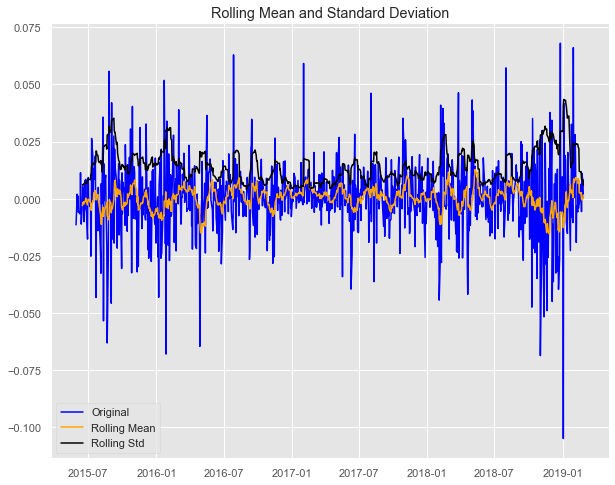

In [226]:
X_train_log_diff = X_train_log - X_train_log.shift(1) 
test_stationarity(X_train_log_diff.dropna())

### Seasonality
By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.
We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.
We use the code below to check the stationarity of residuals.

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-5132.394, BIC=-5103.300, Time=0.318 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-5137.254, BIC=-5127.556, Time=0.079 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-5135.583, BIC=-5121.036, Time=0.061 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-5135.604, BIC=-5121.056, Time=0.070 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-5138.923, BIC=-5134.074, Time=0.091 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-5133.379, BIC=-5113.983, Time=0.085 seconds
Total fit time: 0.709 seconds


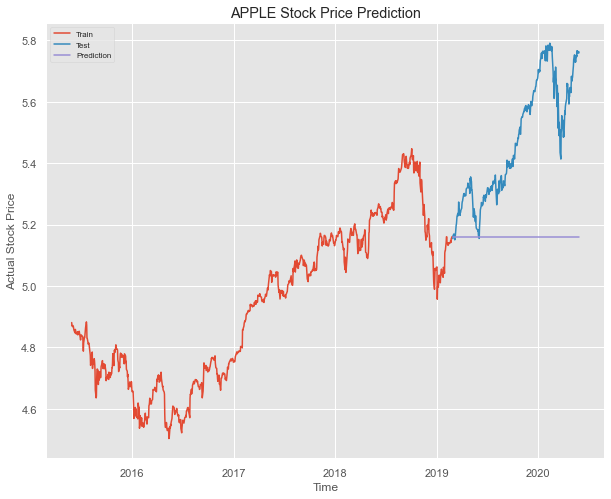

In [227]:
from pmdarima import auto_arima
model = auto_arima(X_train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(X_train_log)
forecast = model.predict(n_periods=len(X_test))
forecast = pd.DataFrame(forecast,index = X_test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(X_train_log, label='Train')
plt.plot(X_test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [228]:
rms = sqrt(mean_squared_error(X_test_log,forecast))
print("RMSE: ", rms)

RMSE:  0.3593040704819902


In [144]:
# set prices Date to datetime
#df['Date'] = pd.to_datetime(df['Date'])

In [147]:
# set prices index to Date column
#df.set_index('Date', inplace=True)
#df.sort_index(inplace=True)

In [229]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Date,,,,,,,,,
2015-05-28,131.860001,131.949997,131.100006,131.779999,121.449577,30733300,2015,1.791759,28
2015-05-29,131.229996,131.449997,129.899994,130.279999,120.067184,50884500,2015,1.791759,29
2015-06-01,130.279999,131.389999,130.050003,130.539993,120.306801,32112800,2015,1.945910,1
2015-06-02,129.860001,130.660004,129.320007,129.960007,119.772255,33667600,2015,1.945910,2
2015-06-03,130.660004,130.940002,129.899994,130.119995,119.919716,30983500,2015,1.945910,3


In [230]:
# Drop Adj Close column
df.drop(columns='Adj Close', inplace = True)

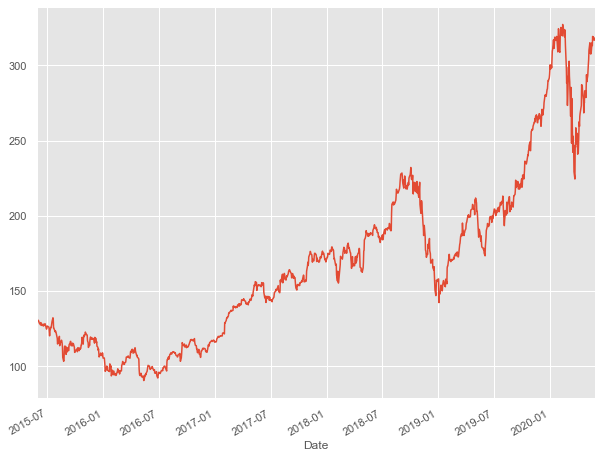

In [231]:
# Plot Close column
df['Close'].plot()



We will be predicting the ‘close’ price. From the plot we can see that the trend is highly non-linear and it is very difficult to capture the trend using this information.

In [232]:
# Convert prices to be percent changes from prior row
# Convert prices to be percent changes from prior row
df = df.pct_change()
df.head()

,Open,High,Low,Close,Volume,year,month,day
Date,,,,,,,,
2015-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-29,-0.004778,-0.003789,-0.009153,-0.011383,0.655680,0.0,0.000000,0.035714
2015-06-01,-0.007239,-0.000456,0.001155,0.001996,-0.368908,0.0,0.086033,-0.965517
2015-06-02,-0.003224,-0.005556,-0.005613,-0.004443,0.048417,0.0,0.000000,1.000000
2015-06-03,0.006161,0.002143,0.004485,0.001231,-0.079724,0.0,0.000000,0.500000


Simple Moving Average (SMA):- is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods. The SMA is basically the average price of the given time period, with equal weighting given to the price of each period.

Formula: SMA = ( Sum ( Price, n ) ) / n

Where: n = Time Period

In [233]:

df['SMA_5'] = (sum(df.Close, 5))/5
df['SMA_30'] = (sum(df.Close, 30))/30
df['SMA_60'] = (sum(df.Close, 60))/60
df['SMA_90'] = (sum(df.Close, 90))/90
df['SMA_180'] = (sum(df.Close, 180))/180

### Exponential moving average (EMA)

In [234]:
df['ema_5'] = df.Close.ewm(span = 10).mean().fillna(0)
df['ema_30'] = df.Close.ewm(span = 30).mean().fillna(0)
df['ema_60'] = df.Close.ewm(span = 60).mean().fillna(0)
df['ema_90'] = df.Close.ewm(span = 90).mean().fillna(0)
df['ema_180'] = df.Close.ewm(span = 180).mean().fillna(0)

### Average true range (ATR)

In [235]:
pip install TA-Lib


Note: you may need to restart the kernel to use updated packages.


In [236]:
import talib 

In [237]:
df['ATR'] = talib.ATR(df['High'].values,
                    df['Low'].values,
                    df['Close'].values,
                   timeperiod = 14)

### Average Directional Index (ADX)

In [238]:
df['ADX'] = talib.ADX(df.High, df.Low, df.Close, timeperiod = 14)

### Commodity Channel Index (CCI)

In [239]:
!pip install --upgrade dask

Requirement already up-to-date: dask in /Users/derejeworkneh/anaconda3/lib/python3.6/site-packages (2.17.2)


In [240]:
pip show dask

Name: dask
Version: 2.17.2
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: None
Author-email: None
License: BSD
Location: /Users/derejeworkneh/anaconda3/lib/python3.6/site-packages
Requires: pyyaml
Required-by: distributed, blaze
Note: you may need to restart the kernel to use updated packages.


In [241]:
#!pip3 install -- upgrade pandas

In [242]:
df.head()

,Open,High,Low,Close,Volume,year,month,day,SMA_5,SMA_30,SMA_60,SMA_90,SMA_180,ema_5,ema_30,ema_60,ema_90,ema_180,ATR,ADX
Date,,,,,,,,,,,,,,,,,,,,
2015-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2015-05-29,-0.004778,-0.003789,-0.009153,-0.011383,0.655680,0.0,0.000000,0.035714,NaN,NaN,NaN,NaN,NaN,-0.011383,-0.011383,-0.011383,-0.011383,-0.011383,NaN,NaN
2015-06-01,-0.007239,-0.000456,0.001155,0.001996,-0.368908,0.0,0.086033,-0.965517,NaN,NaN,NaN,NaN,NaN,-0.004025,-0.004471,-0.004582,-0.004619,-0.004656,NaN,NaN
2015-06-02,-0.003224,-0.005556,-0.005613,-0.004443,0.048417,0.0,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,-0.004193,-0.004461,-0.004534,-0.004559,-0.004584,NaN,NaN
2015-06-03,0.006161,0.002143,0.004485,0.001231,-0.079724,0.0,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,-0.002406,-0.002892,-0.003020,-0.003063,-0.003106,NaN,NaN


In [243]:
df.tp = (df.High + df.Low + df.Close)/3

In [244]:
# Calculating commudity channel index
tp = (df['High'] + df['Low'] + df['Close'])/3

ma = tp/20
md = (tp - ma)/20
df['CCI'] = (tp-ma)/(0.05 * md)

### Rate-of-change (ROC)

- ROC = [(Close price today — Close price “n” day’s ago) / Close price “n” day’s ago))]

In [245]:
df['ROC'] = ((df['Close']-df['Close'].shift(12))/(df['Close'].shift(12)))*100

In [246]:
# Relative Strength Index (RSI)
df['rsi']=talib.RSI(df.Close.values, timeperiod = 14)

In [247]:
df.head()

,Open,High,Low,Close,Volume,year,month,day,SMA_5,SMA_30,...,ema_5,ema_30,ema_60,ema_90,ema_180,ATR,ADX,CCI,ROC,rsi
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2015-05-29,-0.004778,-0.003789,-0.009153,-0.011383,0.655680,0.0,0.000000,0.035714,NaN,NaN,...,-0.011383,-0.011383,-0.011383,-0.011383,-0.011383,NaN,NaN,400.0,NaN,NaN
2015-06-01,-0.007239,-0.000456,0.001155,0.001996,-0.368908,0.0,0.086033,-0.965517,NaN,NaN,...,-0.004025,-0.004471,-0.004582,-0.004619,-0.004656,NaN,NaN,400.0,NaN,NaN
2015-06-02,-0.003224,-0.005556,-0.005613,-0.004443,0.048417,0.0,0.000000,1.000000,NaN,NaN,...,-0.004193,-0.004461,-0.004534,-0.004559,-0.004584,NaN,NaN,400.0,NaN,NaN
2015-06-03,0.006161,0.002143,0.004485,0.001231,-0.079724,0.0,0.000000,0.500000,NaN,NaN,...,-0.002406,-0.002892,-0.003020,-0.003063,-0.003106,NaN,NaN,400.0,NaN,NaN


In [248]:
# William’s %R it shows the relationship between the current closing price and the high 
#and low prices over the latest n days equal to the input window length.
df['williams % R'] = talib.WILLR(df.High.values,
                                df.Low.values,
                                df.Close.values, 14)

In [249]:
# Stochastic %K-It compares a close 
#price and its price interval during a period of n past 
#days and gives a signal meaning that a stock is oversold or overbought.
df['Stochastic'] = ((df['Close'] - df['Low']) / (df['High'] - df['Low']))

In [250]:
df.head()

,Open,High,Low,Close,Volume,year,month,day,SMA_5,SMA_30,...,ema_60,ema_90,ema_180,ATR,ADX,CCI,ROC,rsi,williams % R,Stochastic
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-29,-0.004778,-0.003789,-0.009153,-0.011383,0.655680,0.0,0.000000,0.035714,NaN,NaN,...,-0.011383,-0.011383,-0.011383,NaN,NaN,400.0,NaN,NaN,NaN,-0.415578
2015-06-01,-0.007239,-0.000456,0.001155,0.001996,-0.368908,0.0,0.086033,-0.965517,NaN,NaN,...,-0.004582,-0.004619,-0.004656,NaN,NaN,400.0,NaN,NaN,NaN,-0.521868
2015-06-02,-0.003224,-0.005556,-0.005613,-0.004443,0.048417,0.0,0.000000,1.000000,NaN,NaN,...,-0.004534,-0.004559,-0.004584,NaN,NaN,400.0,NaN,NaN,NaN,20.438931
2015-06-03,0.006161,0.002143,0.004485,0.001231,-0.079724,0.0,0.000000,0.500000,NaN,NaN,...,-0.003020,-0.003063,-0.003106,NaN,NaN,400.0,NaN,NaN,NaN,1.389375


In [251]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'year', 'month', 'day',
       'SMA_5', 'SMA_30', 'SMA_60', 'SMA_90', 'SMA_180', 'ema_5', 'ema_30',
       'ema_60', 'ema_90', 'ema_180', 'ATR', 'ADX', 'CCI', 'ROC', 'rsi',
       'williams % R', 'Stochastic'],
      dtype='object')

In [252]:
df.index

DatetimeIndex(['2015-05-28', '2015-05-29', '2015-06-01', '2015-06-02',
               '2015-06-03', '2015-06-04', '2015-06-05', '2015-06-08',
               '2015-06-09', '2015-06-10',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-26', '2020-05-27'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [253]:
df.shape # Total dataset has 1259 samples and 22 features.

(1259, 25)

- The goal here is to predict (t+1) value based on N previous days information. Therefore, defining the output value as pred_price, which is a binary variable storing 1 when the closing price of tomorrow > today and this way we are turning this into a classification problem.

- The objective this project is to predict the stock price. The forecasting algorithm aims to foresee whether tomorrow’s close price is going to be lower or higher with respect to today.
- Regression Predictive Modeling Problem (trying to forecast exact open price or return next day
- Binary classification problem (price will go up [1; 0] or down [0; 1]).

In [254]:
df['pre_price'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [255]:
df.head()

,Open,High,Low,Close,Volume,year,month,day,SMA_5,SMA_30,...,ema_90,ema_180,ATR,ADX,CCI,ROC,rsi,williams % R,Stochastic,pre_price
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-05-29,-0.004778,-0.003789,-0.009153,-0.011383,0.655680,0.0,0.000000,0.035714,NaN,NaN,...,-0.011383,-0.011383,NaN,NaN,400.0,NaN,NaN,NaN,-0.415578,1
2015-06-01,-0.007239,-0.000456,0.001155,0.001996,-0.368908,0.0,0.086033,-0.965517,NaN,NaN,...,-0.004619,-0.004656,NaN,NaN,400.0,NaN,NaN,NaN,-0.521868,0
2015-06-02,-0.003224,-0.005556,-0.005613,-0.004443,0.048417,0.0,0.000000,1.000000,NaN,NaN,...,-0.004559,-0.004584,NaN,NaN,400.0,NaN,NaN,NaN,20.438931,1
2015-06-03,0.006161,0.002143,0.004485,0.001231,-0.079724,0.0,0.000000,0.500000,NaN,NaN,...,-0.003063,-0.003106,NaN,NaN,400.0,NaN,NaN,NaN,1.389375,0


In [256]:
#df = df.dropna().sum()

In [257]:
#df.head()

In [179]:
#X = 

In [180]:
# df['ATR'] = ( df['ATR'].shift(1)*13 + df['TR'] ) /  14

In [181]:
# Drop nulls
df.dropna(inplace = True)

In [182]:
# Plot Close column again
#df['Close'].plot()

In [183]:
#prices.head()

In [184]:
# Create Target column
df['Target']= (df['Close'] >=0).astype(int)

In [185]:
# Create X and y
X = df.drop(columns = 'Target')
y = df['Target']

In [186]:
features = list(X.columns)

In [187]:
features

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'year',
 'month',
 'day',
 'SMA_5',
 'SMA_30',
 'SMA_60',
 'SMA_90',
 'SMA_180',
 'ema_5',
 'ema_30',
 'ema_60',
 'ema_90',
 'ema_180',
 'ATR',
 'ADX',
 'CCI',
 'ROC',
 'rsi',
 'williams % R',
 'Stochastic',
 'pre_price']

- It is important we do not randomly pick training and testing samples. 

In [259]:
# Train/Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)